In [ ]:
 1) Perform general Data analysis
 2)Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot
 3) Create a plot based on the Variation of the price range by the vehicle type
 4) Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client
 5) Is there any relationship between dollar_price and kilometer? (Explain with appropriate analysis)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

#### 1) Perform general Data analysis

In [2]:
df= pd.read_csv("Ger_autos_cleaned.csv")

In [3]:
df

,Unnamed: 0,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
0,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163.0,grand,125000,8,diesel,jeep,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
1,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75.0,golf,150000,6,benzin,volkswagen,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
2,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69.0,fabia,90000,7,diesel,skoda,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
3,5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102.0,3er,150000,10,benzin,bmw,2016-04-04 00:00:00,33775,2016-04-06 19:17:07
4,6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109.0,2_reihe,150000,8,benzin,peugeot,2016-04-01 00:00:00,67112,2016-04-05 18:18:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280552,371521,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,privat,Angebot,1150,control,bus,2000,manuell,114.0,zafira,150000,3,benzin,opel,2016-03-27 00:00:00,26624,2016-03-29 10:17:23
280553,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101.0,fortwo,125000,3,benzin,smart,2016-03-05 00:00:00,26135,2016-03-11 18:17:12
280554,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102.0,transporter,150000,3,diesel,volkswagen,2016-03-19 00:00:00,87439,2016-04-07 07:15:26
280555,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100.0,golf,150000,6,diesel,volkswagen,2016-03-20 00:00:00,40764,2016-03-24 12:45:21


In [4]:
df.drop(columns='Unnamed: 0', inplace=True)

#### 2) Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot

<Axes: ylabel='Density'>

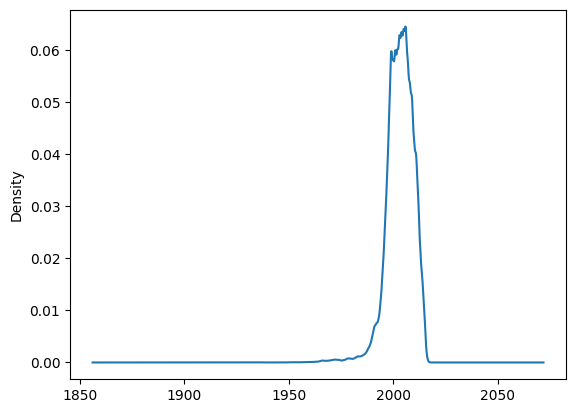

In [5]:
df['yearOfRegistration'].plot(kind='kde')

((array([-4.56726822, -4.37769721, -4.27489605, ...,  4.27489605,
          4.37769721,  4.56726822]),
  array([1910, 1923, 1923, ..., 2018, 2018, 2018], dtype=int64)),
 (6.24161964763748, 2003.3085362332788, 0.959323633962324))

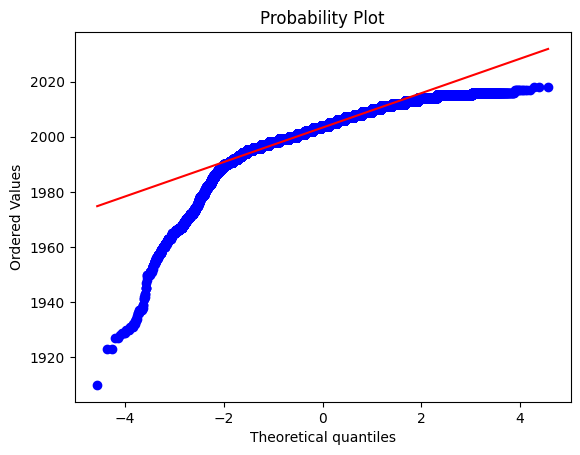

In [6]:
st.probplot(x=df['yearOfRegistration'],plot=plt)

In [7]:
df['yearOfRegistration'].mean(), df['yearOfRegistration'].median()

(2003.3085362332788, 2004.0)

The 'year of registration' feature seems to roughly follow normal distribution and is skewed to the left. With more data it would ideally follow normal distribution.

#### 3) Create a plot based on the Variation of the price range by the vehicle type

In [8]:
priceVar = df.groupby(by='vehicleType')['price'].mean()
priceVar

vehicleType
andere         4754.158759
bus            7021.433732
cabrio        10868.005951
coupe         12461.823548
kleinwagen     3255.738053
kombi          6339.509732
limousine      6396.276835
suv           13826.443043
Name: price, dtype: float64

<Axes: xlabel='vehicleType'>

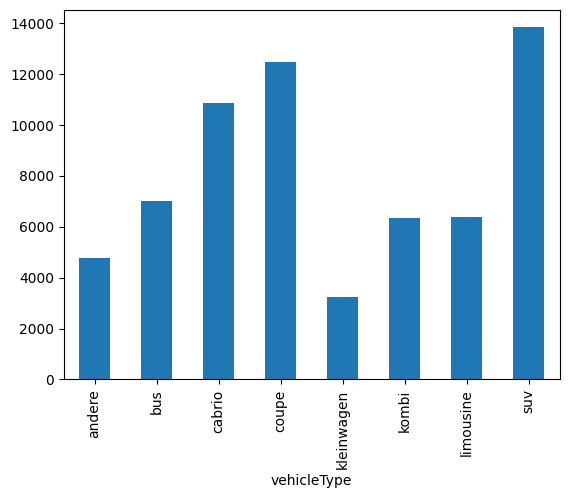

In [9]:
priceVar.plot(kind='bar')

#### 4) Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client

In [10]:
cnt = df['vehicleType'].value_counts()
cnt

vehicleType
limousine     82775
kleinwagen    61482
kombi         57952
bus           27072
cabrio        20164
coupe         15840
suv           13080
andere         2192
Name: count, dtype: int64

<Axes: xlabel='vehicleType'>

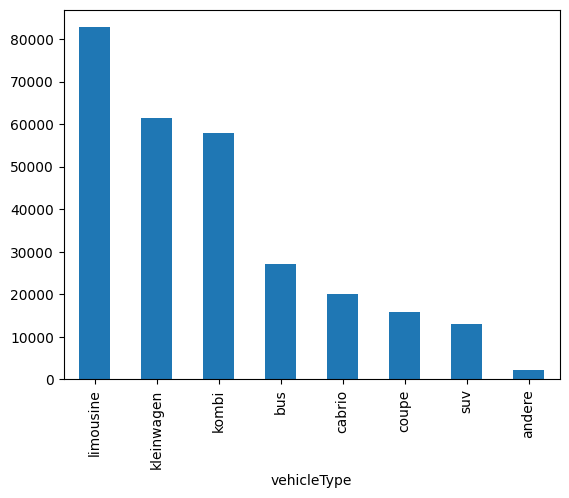

In [11]:
cnt.plot(kind='bar')

#### 5) Is there any relationship between dollar_price and kilometer? (Explain with appropriate analysis)

<Axes: >

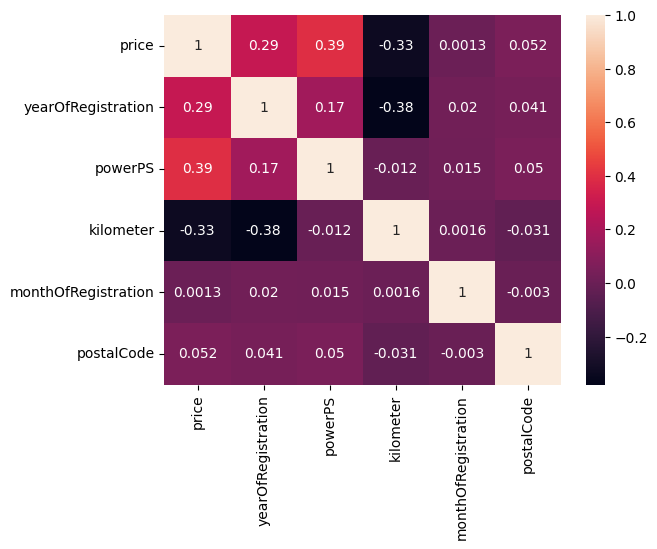

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: xlabel='kilometer', ylabel='price'>

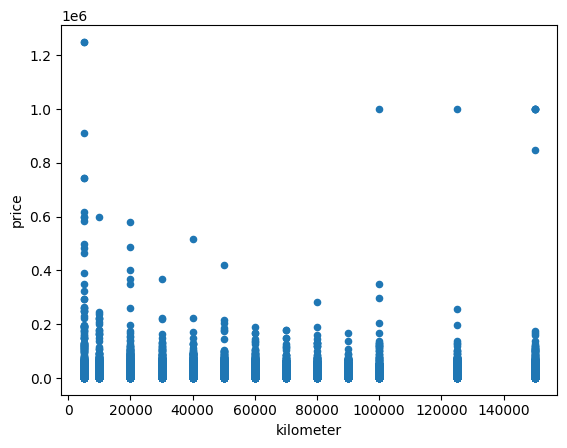

In [13]:
df.plot('kilometer', 'price', kind='scatter')